In [3]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from pycaret.regression import *

In [7]:
# Read in Data
df_train = pd.read_csv('s3e8_train.csv')
df_test = pd.read_csv('s3e8_test.csv')
df_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [8]:
# Info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [9]:
# Categorical Variables
cat_vars = ['cut', 'color', 'clarity']

# Numeric variables
num_vars = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

# Missing values
df_train.isna().sum() # No nulls

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### EDA: Numeric Features

<AxesSubplot:>

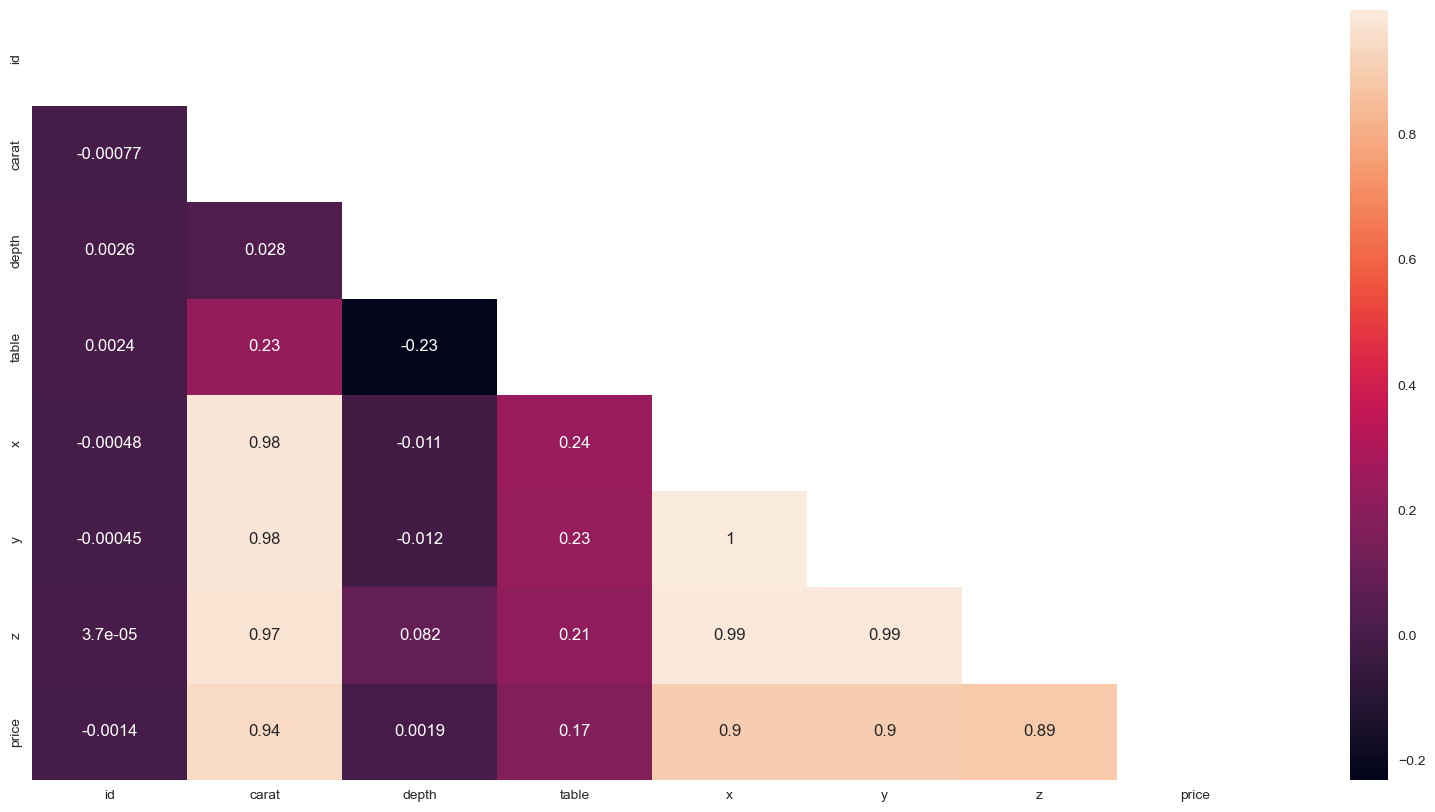

In [10]:
## Correlation Matrix
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(df_train.corr()))
sns.heatmap(df_train.corr(), annot=True, mask=mask)
# Price is highly correlated with carat, x, y, z

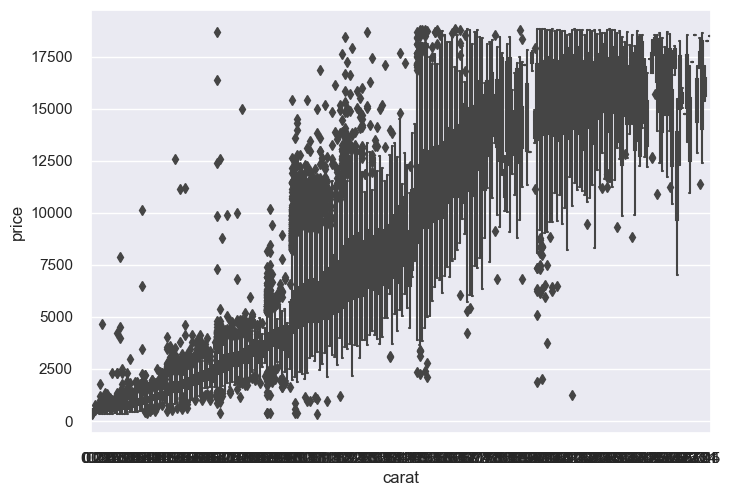

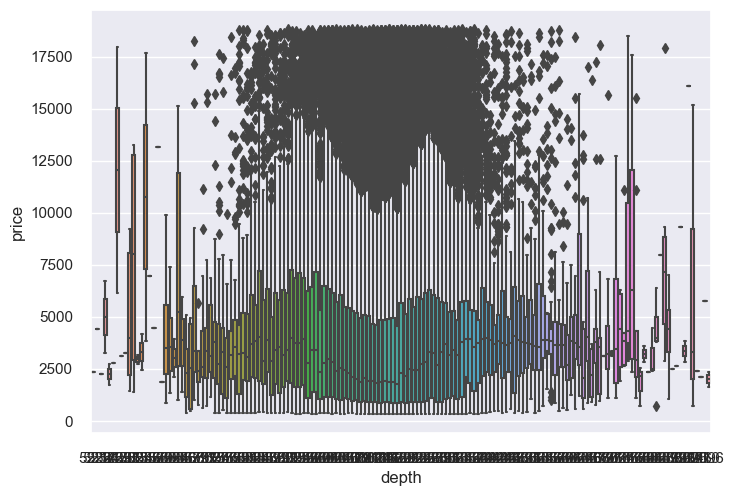

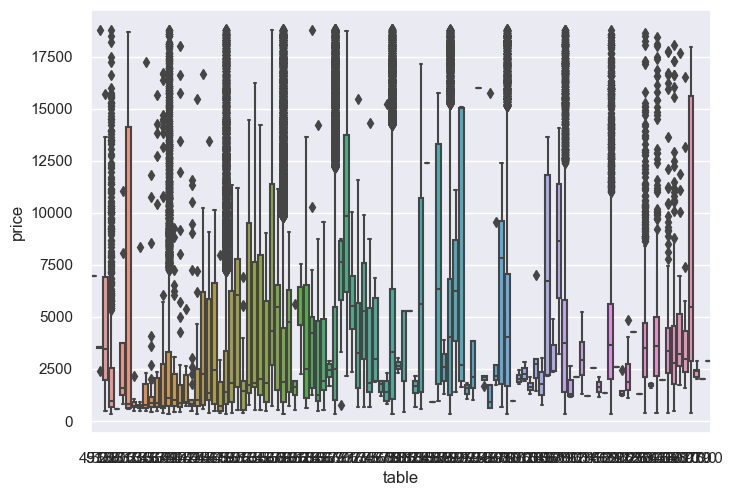

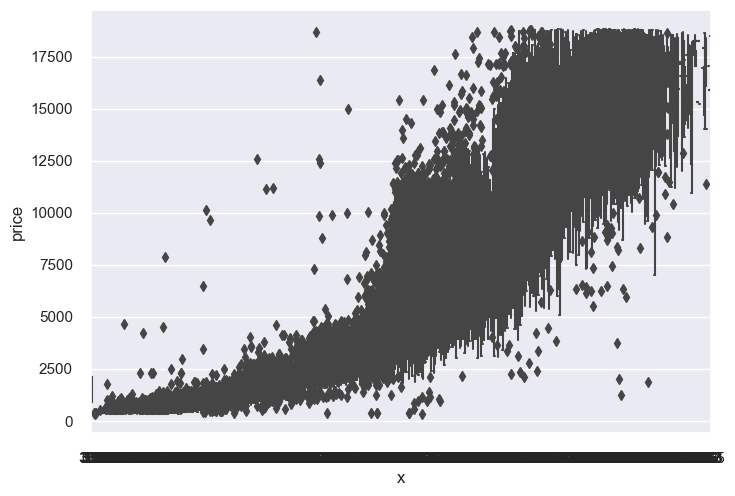

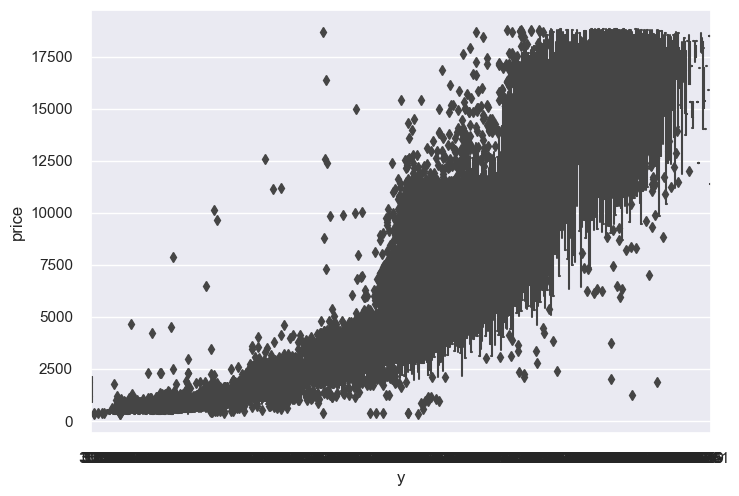

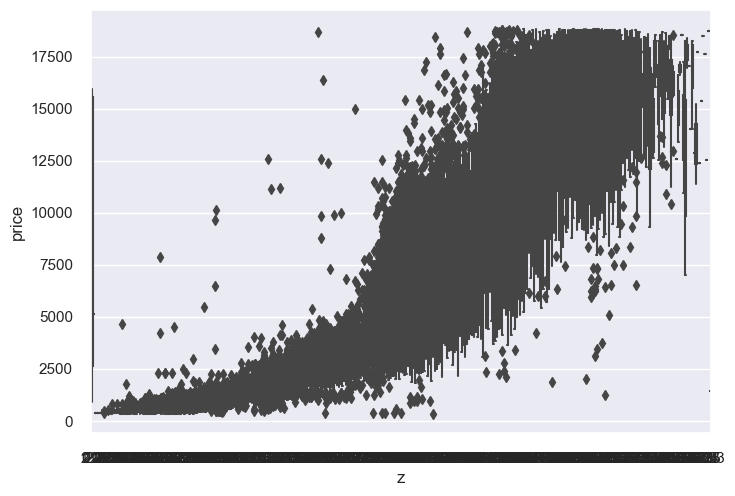

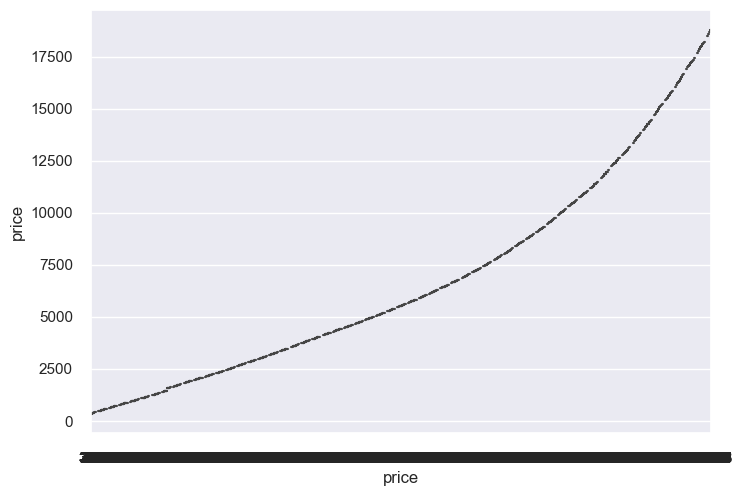

In [11]:
# Boxplots
for i in num_vars:
    plt.figsize=(16,6)
    sns.set_theme(style='darkgrid')
    sns.boxplot(x=i, y='price', data=df_train)
    plt.show()

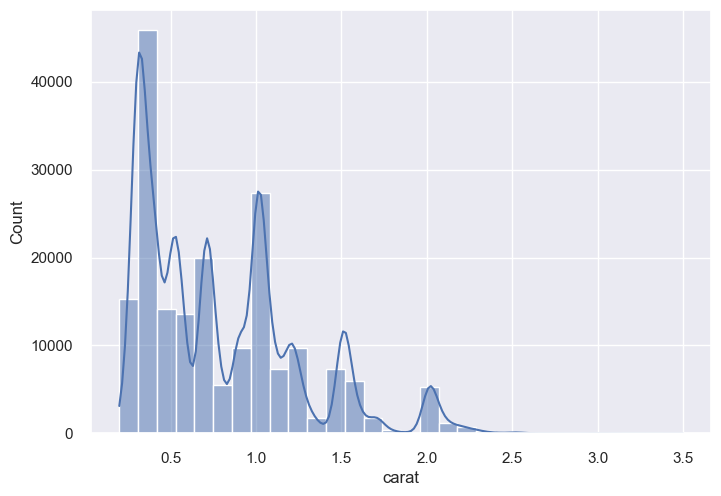

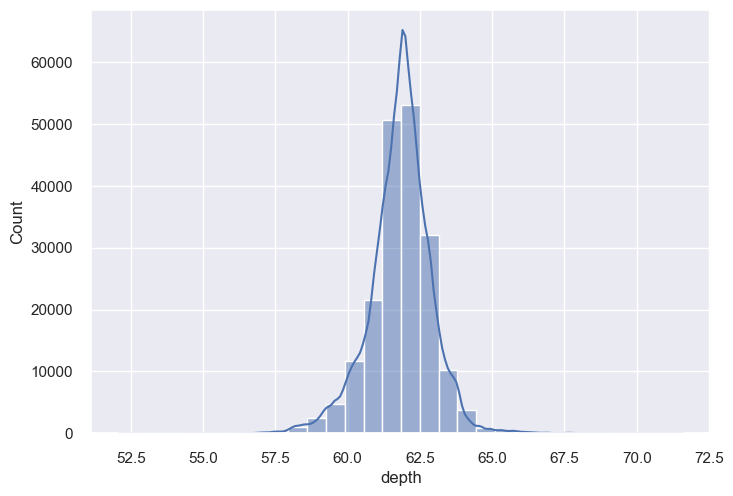

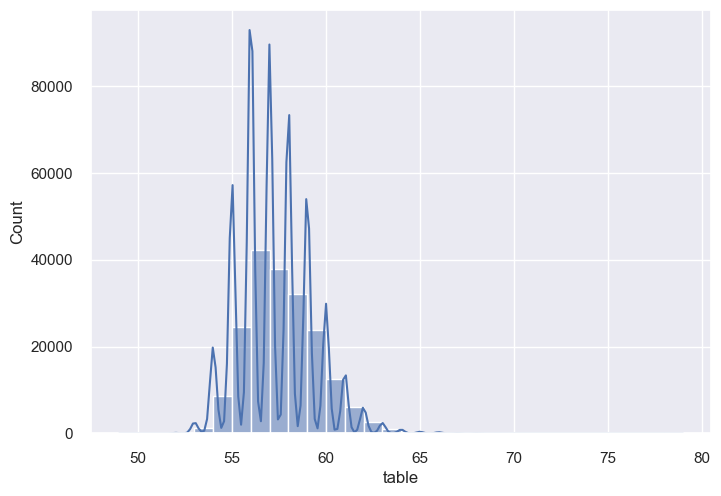

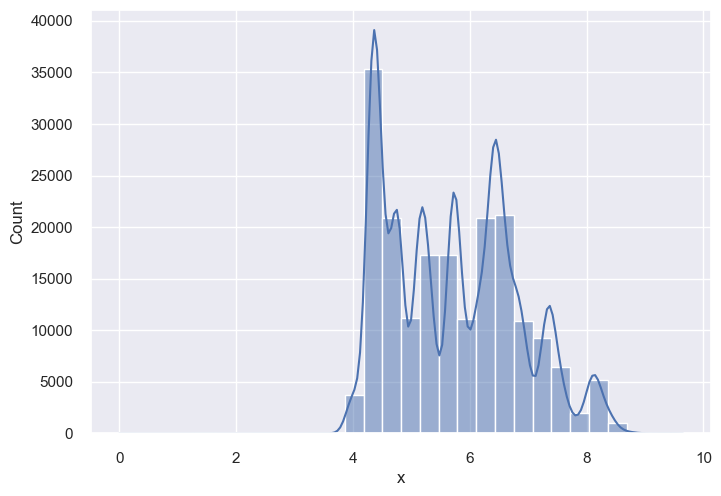

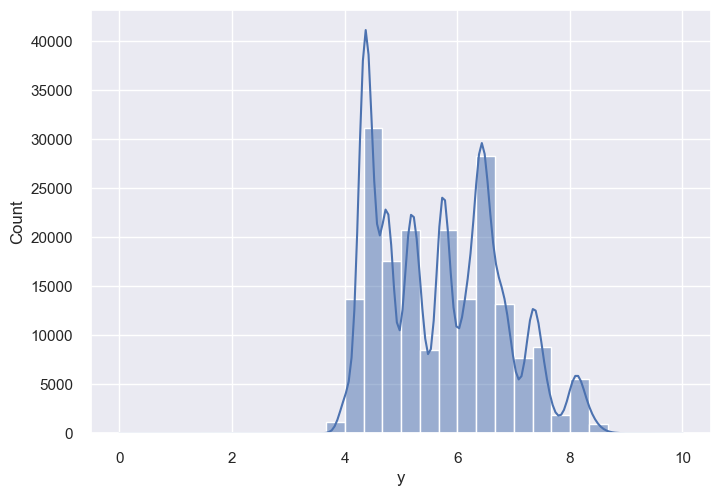

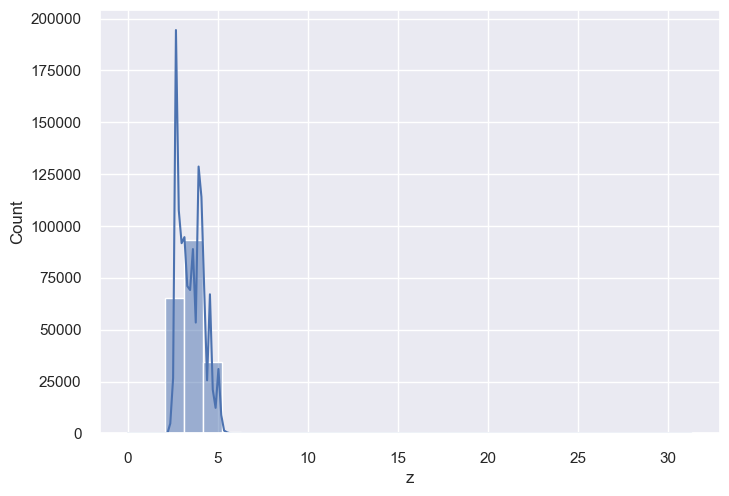

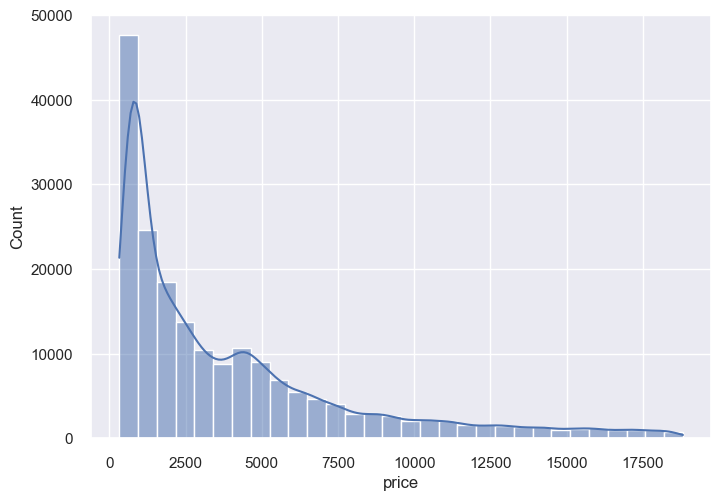

In [12]:
# Histograms
for i in num_vars:
    plt.figsize=(16,6)
    sns.set_theme(style='darkgrid')
    sns.histplot(data=df_train, x=i, bins=30, kde=True)
    plt.show()

### EDA: Categorical Features

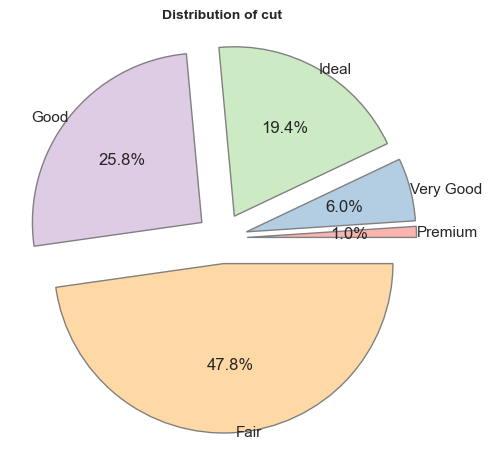

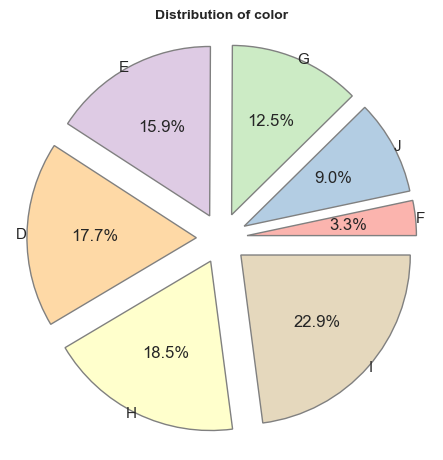

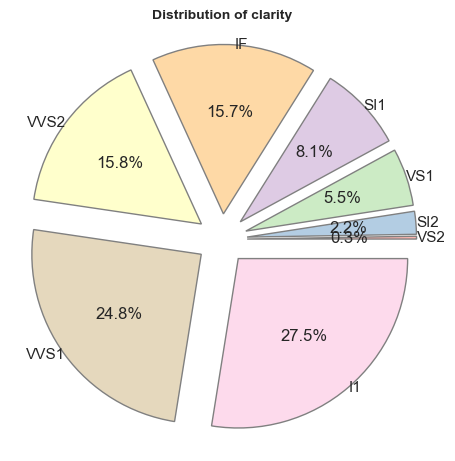

In [13]:
## PIE CHARTS
for i in cat_vars:
    title = 'Distribution of ' + i
    labels = df_train[i].unique()
    expl = np.ones(len(labels))*0.15
    plt.pie(df_train[i].value_counts().sort_values(),autopct='%.1f%%',explode=expl, labels=labels,
            colors=sns.color_palette('Pastel1'),labeldistance=1, wedgeprops={'linewidth':1, 'edgecolor':'gray'})
    plt.title(label=title, fontdict={'fontweight':'bold','fontsize':10}, loc ="center")
    plt.show()

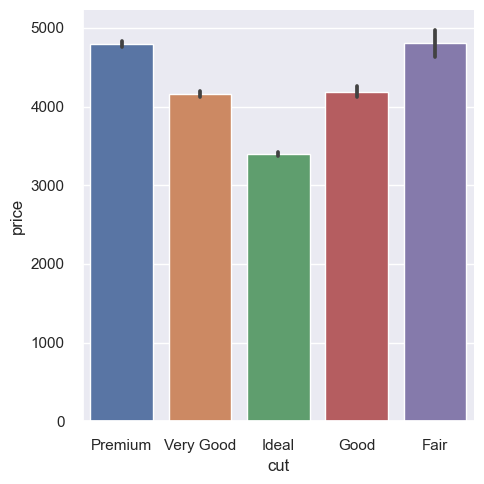

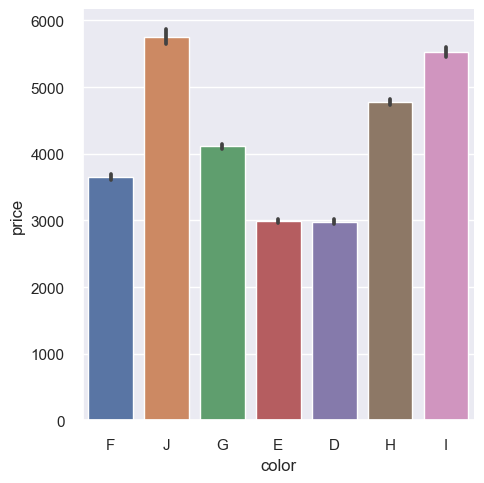

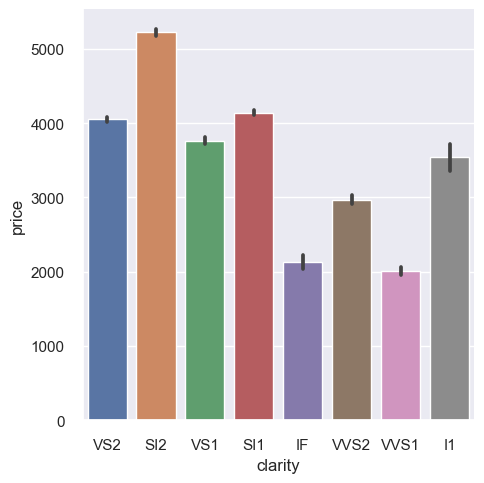

In [14]:
## BAR PLOTS
for i in cat_vars:
    cat = sns.catplot(data=df_train, x=i, y='price', kind='bar')
    plt.show()

In [15]:
# OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

df_cat = df_train[cat_vars]
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(df_cat_1hot.toarray())

# Column names
cat_categories = pd.DataFrame(cat_encoder.categories_).transpose()
cat_cols = ['Fair','Good','Ideal','Premium','Very Good',
            'D','E','F','G','H','I','J',
            'I1','IF','ST1','SI2','VS1','VS2','VVS1','VVS2']

df_cat_encoded.columns = cat_cols
df_num = df_train[num_vars]
df_full = df = pd.concat([df_num, df_cat_encoded], axis=1, join='inner')

In [16]:
## TEST SET
test_num_vars = ['carat', 'depth', 'table', 'x', 'y', 'z']
df_cat = df_test[cat_vars]
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(df_cat_1hot.toarray())
df_cat_encoded.columns = cat_cols
df_num_test = df_test[test_num_vars]
df_full_test = pd.concat([df_num_test, df_cat_encoded], axis=1, join='inner')

### Modeling with Pycaret

In [17]:
# pycaret setup
setup(df_full, target = 'price')
setup_df = pull()  

# Best model
best = compare_models()
compare_df = pull()
print(best)


# Make predictions on test set
sub_preds = predict_model(best, data=df_full_test)
Id = df_test['id']
sub_df = pd.DataFrame([Id, sub_preds['prediction_label']]).transpose()
sub_df.columns = ['id','price']
sub_df['id'] = sub_df['id'].astype(int)
# sub_df.to_csv('Submission1.csv', index=False)

,Description,Value
0,Session id,456
1,Target,price
2,Target type,Regression
3,Original data shape,"(193573, 27)"
4,Transformed data shape,"(193573, 27)"
5,Transformed train set shape,"(135501, 27)"
6,Transformed test set shape,"(58072, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,302.4904,337689.9187,581.0361,0.9792,0.1139,0.0862,0.3200
xgboost,Extreme Gradient Boosting,304.4779,352436.8826,593.5527,0.9783,0.1113,0.0829,1.3550
rf,Random Forest Regressor,313.3809,375080.6885,612.3535,0.9770,0.1140,0.0834,12.1010
et,Extra Trees Regressor,321.2345,395060.6396,628.4230,0.9757,0.1169,0.0853,16.0470
gbr,Gradient Boosting Regressor,374.1132,472756.5469,687.5039,0.9710,0.1583,0.1139,2.9540
knn,K Neighbors Regressor,399.0533,588496.0950,767.0692,0.9638,0.1494,0.1105,21.0360
dt,Decision Tree Regressor,424.7135,696929.8354,834.6538,0.9572,0.1528,0.1099,0.1770
br,Bayesian Ridge,626.4627,909629.2606,953.6053,0.9441,0.5333,0.3234,0.1760
ridge,Ridge Regression,626.5369,909621.6874,953.6015,0.9441,0.5334,0.3234,0.0590
lasso,Lasso Regression,624.8676,909972.9534,953.7975,0.9441,0.5355,0.3190,0.6930


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(random_state=456)
